In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score

In [3]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Load dataset
df = pd.read_csv("C:\\Users\\Hp\\Desktop\\creditcard\\creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
print("Number of columns: {}".format(df.shape[1]))
print("Number of rows: {}".format(df.shape[0]))

Number of columns: 31
Number of rows: 284807


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

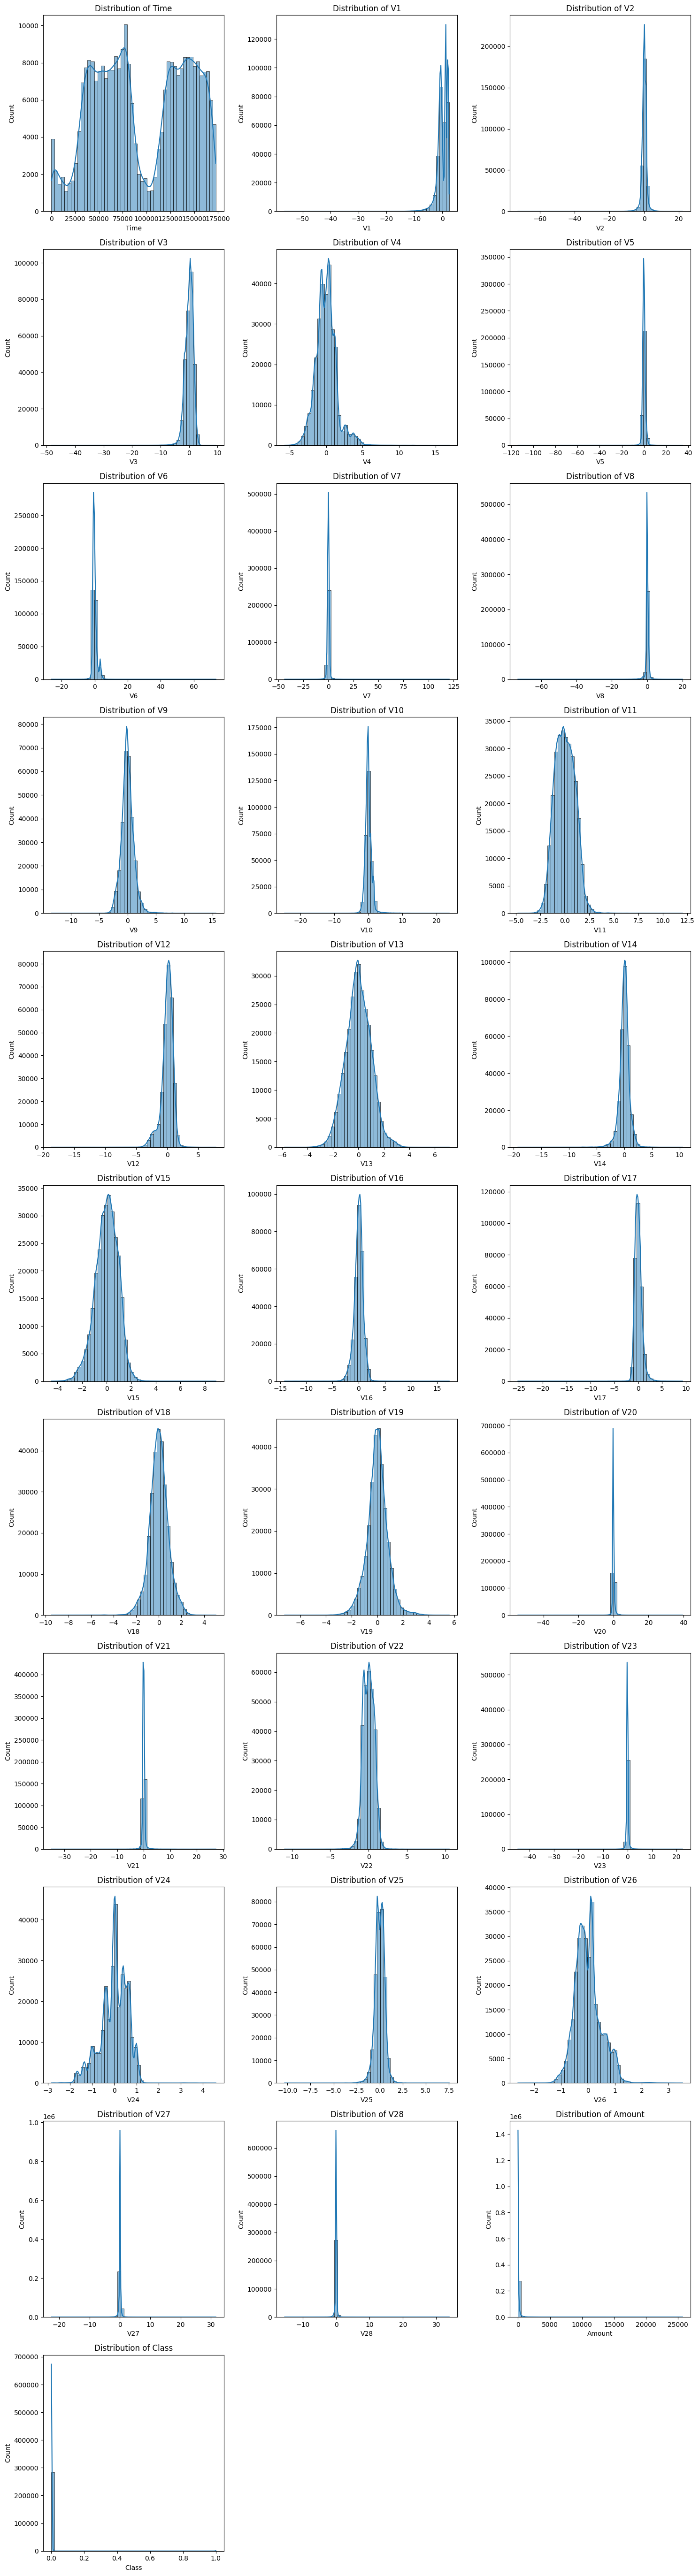

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
float_cols = [col for col in df.columns if df[col].dtype == "float64" or df[col].dtype == "int64"]

cols_per_row = 3
num_plots = len(float_cols)
rows = (num_plots // cols_per_row) + (num_plots % cols_per_row > 0) 

fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, 5 * rows)) 
axes = axes.flatten()  

for idx, col in enumerate(float_cols):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[idx])
    axes[idx].set_title(f"Distribution of {col}")

for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

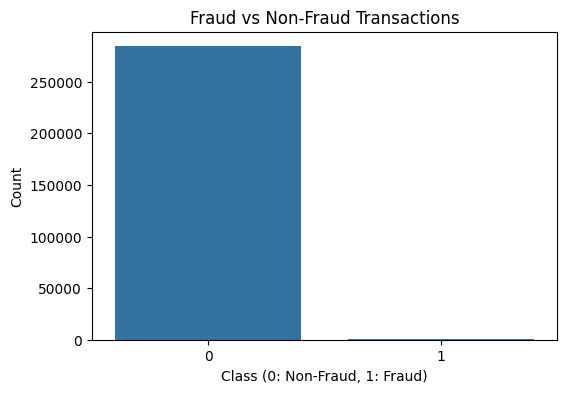

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Class')
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()

In [12]:
fraud = df[df['Class'] == 1]
fraud_num = len(fraud)
valid = df[df['Class'] == 0]
valid_num = len(valid)
outlier_percentage = len(fraud) / float(len(valid)) * 100.0

print(f"{outlier_percentage:.2f}%")
print(f'Fraud transactions: {fraud_num}')
print(f'Valid transactions: {valid_num}')

0.17%
Fraud transactions: 492
Valid transactions: 284315


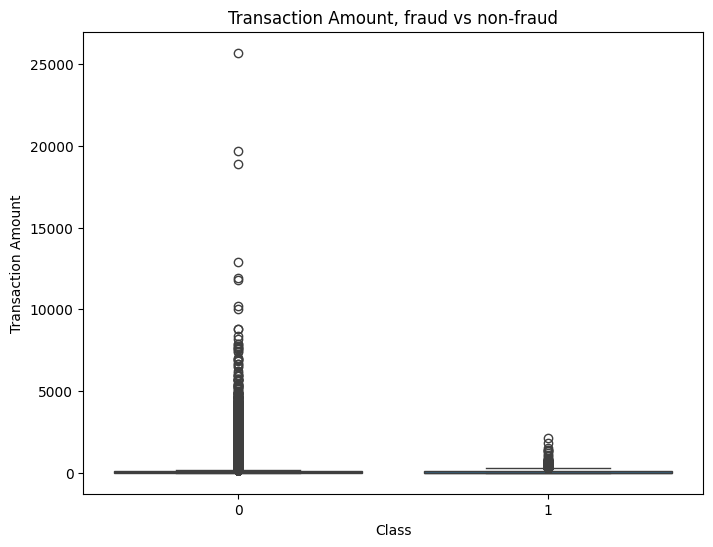

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Class', y='Amount')
plt.title('Transaction Amount, fraud vs non-fraud')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.show()

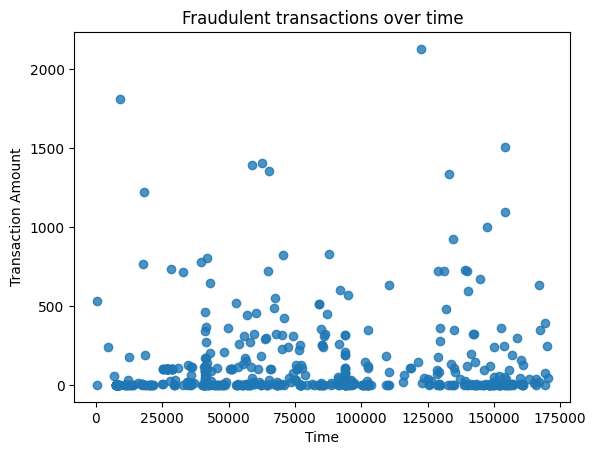

In [14]:
plt.scatter(fraud['Time'], fraud['Amount'], alpha=0.8)
plt.title('Fraudulent transactions over time')
plt.xlabel('Time')
plt.ylabel('Transaction Amount')
plt.show()

In [15]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

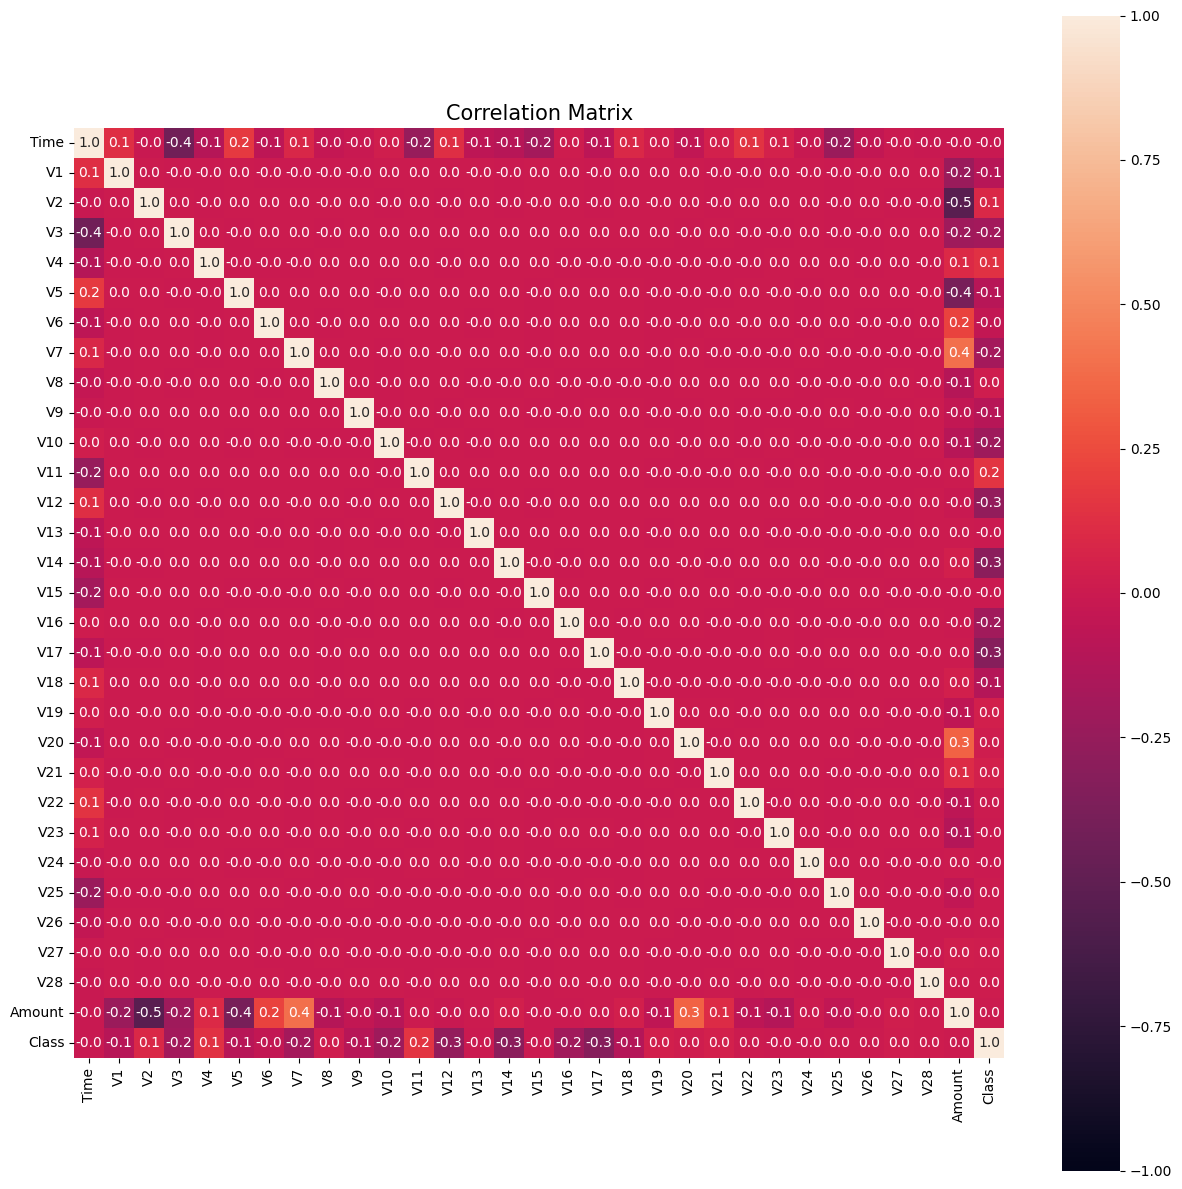

In [16]:
corr_mat = df.corr()
fig = plt.figure(figsize=(15, 15))
sns.heatmap(data=corr_mat, annot=True, vmin=-1, vmax=1, fmt='.1f', square=True)
plt.title("Correlation Matrix", size=15)
plt.show()

In [17]:
sc = StandardScaler()
df['Amount'] = sc.fit_transform(pd.DataFrame(df['Amount']))


In [18]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [19]:
df = df.drop(['Time'], axis =1)

In [20]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [21]:
df.duplicated().any()

True

In [22]:
df = df.drop_duplicates()

In [23]:
df.shape

(275663, 30)

In [24]:
df['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

In [25]:
# Split features and target
X = df.drop(columns=["Class"])  # Features
y = df["Class"]  # Target (0 = Legit, 1 = Fraud)



In [26]:
from xgboost import XGBClassifier
# Define XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)


In [27]:

from sklearn.model_selection import cross_val_predict, StratifiedKFold
# 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [28]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
# Cross-validation predictions
y_pred = cross_val_predict(xgb, X, y, cv=cv)


C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [10:30:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [10:30:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [10:30:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarn

In [29]:
from sklearn.metrics import classification_report
# Print classification report
print("\nClassification Report:")
print(classification_report(y, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    275190
           1       0.94      0.78      0.85       473

    accuracy                           1.00    275663
   macro avg       0.97      0.89      0.93    275663
weighted avg       1.00      1.00      1.00    275663



In [30]:
# Hyperparameter grid for tuning
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.8, 0.9, 1.0],
}

In [31]:
# 5-fold cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [32]:
# Randomized Search with 10 iterations
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=10,  # Limits number of parameter combinations
    scoring="f1",
    n_jobs=-1,
    cv=cv,
    verbose=1,
    random_state=42
)

In [33]:
# Fit RandomizedSearchCV
random_search.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [10:33:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           imp...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='f1', verbose=1)

In [34]:
# Get best parameters
best_xgb = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 1.0}


In [35]:
# Evaluate best model using 5-Fold CV predictions
y_pred = cross_val_predict(best_xgb, X, y, cv=cv)


C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [11:31:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [11:31:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [11:31:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarn

In [36]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    275190
           1       0.95      0.78      0.86       473

    accuracy                           1.00    275663
   macro avg       0.97      0.89      0.93    275663
weighted avg       1.00      1.00      1.00    275663



In [37]:
# Check class distribution before applying SMOTE
print("Class distribution before SMOTE:\n", y.value_counts())


Class distribution before SMOTE:
 Class
0    275190
1       473
Name: count, dtype: int64


In [38]:
# Apply SMOTE only on the training folds (to prevent data leakage)
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Adjust ratio if needed


In [39]:
from imblearn.pipeline import Pipeline as ImbPipeline
# Define a pipeline with SMOTE and XGBoost
pipeline = ImbPipeline([("smote", smote), ("xgb", xgb)])


In [40]:
# Randomized Search with 10 iterations
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions={"xgb__" + key: value for key, value in param_grid.items()},
    n_iter=10,  # Limits number of parameter combinations
    scoring="f1",
    n_jobs=-1,
    cv=cv,
    verbose=1,
    random_state=42
)

In [41]:
# Fit RandomizedSearchCV
random_search.fit(X, y)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [11:36:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('smote',
                                              SMOTE(random_state=42,
                                                    sampling_strategy=0.5)),
                                             ('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=...
                                                            monotone_constraints=None,
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            random_state=42, ...))]),
                   n_jobs=-1,
                   param_distributions={'xgb__colsample_bytree': [0.7, 0.8, 0.9,
                                                                  1.0],
                                        'xgb__learning_rate': [0.01, 0.05, 0.1,
                                                               0.2],
                                        'xgb__max_depth': [3, 5, 7, 10],
                                        'xgb__n_estimators': [50, 100, 200],
                                        'xgb__subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='f1', verbose=1)

In [42]:
# Get best parameters
best_xgb = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)


Best Parameters: {'xgb__subsample': 0.7, 'xgb__n_estimators': 100, 'xgb__max_depth': 10, 'xgb__learning_rate': 0.2, 'xgb__colsample_bytree': 0.9}


In [43]:
# Evaluate best model using 5-Fold CV predictions
y_pred = cross_val_predict(best_xgb, X, y, cv=cv)

C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [11:41:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [11:41:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [11:41:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarn

In [44]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    275190
           1       0.79      0.83      0.81       473

    accuracy                           1.00    275663
   macro avg       0.89      0.91      0.90    275663
weighted avg       1.00      1.00      1.00    275663



In [45]:
# Iterate through folds and apply SMOTE inside each fold
for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Print class distribution before SMOTE
    print(f"Fold {fold+1} - Class distribution before SMOTE:\n{y_train.value_counts()}")

    # Apply SMOTE only on training data (not validation)
    smote = SMOTE(sampling_strategy=0.5, random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Print class distribution after SMOTE
    print(f"Fold {fold+1} - Class distribution after SMOTE:\n{y_train_resampled.value_counts()}")


Fold 1 - Class distribution before SMOTE:
Class
0    220152
1       378
Name: count, dtype: int64
Fold 1 - Class distribution after SMOTE:
Class
0    220152
1    110076
Name: count, dtype: int64
Fold 2 - Class distribution before SMOTE:
Class
0    220152
1       378
Name: count, dtype: int64
Fold 2 - Class distribution after SMOTE:
Class
0    220152
1    110076
Name: count, dtype: int64
Fold 3 - Class distribution before SMOTE:
Class
0    220152
1       378
Name: count, dtype: int64
Fold 3 - Class distribution after SMOTE:
Class
0    220152
1    110076
Name: count, dtype: int64
Fold 4 - Class distribution before SMOTE:
Class
0    220152
1       379
Name: count, dtype: int64
Fold 4 - Class distribution after SMOTE:
Class
0    220152
1    110076
Name: count, dtype: int64
Fold 5 - Class distribution before SMOTE:
Class
0    220152
1       379
Name: count, dtype: int64
Fold 5 - Class distribution after SMOTE:
Class
0    220152
1    110076
Name: count, dtype: int64


In [46]:
# Define pipeline with SMOTE and XGBoost
pipeline = ImbPipeline([("smote", SMOTE(sampling_strategy=0.5, random_state=42)), ("xgb", xgb)])


In [47]:
# Randomized Search with 10 iterations
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions={"xgb__" + key: value for key, value in param_grid.items()},
    n_iter=10,  # Limits number of parameter combinations
    scoring="f1",
    n_jobs=-1,
    cv=cv,
    verbose=1,
    random_state=42
)

In [48]:
# Fit RandomizedSearchCV
random_search.fit(X, y)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [11:46:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('smote',
                                              SMOTE(random_state=42,
                                                    sampling_strategy=0.5)),
                                             ('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=...
                                                            monotone_constraints=None,
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            random_state=42, ...))]),
                   n_jobs=-1,
                   param_distributions={'xgb__colsample_bytree': [0.7, 0.8, 0.9,
                                                                  1.0],
                                        'xgb__learning_rate': [0.01, 0.05, 0.1,
                                                               0.2],
                                        'xgb__max_depth': [3, 5, 7, 10],
                                        'xgb__n_estimators': [50, 100, 200],
                                        'xgb__subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='f1', verbose=1)

In [49]:
# Get best parameters
best_xgb = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Evaluate best model using 5-Fold CV predictions
y_pred = cross_val_predict(best_xgb, X, y, cv=cv)

# Print classification report
print("\nClassification Report:")
print(classification_report(y, y_pred))

Best Parameters: {'xgb__subsample': 0.7, 'xgb__n_estimators': 100, 'xgb__max_depth': 10, 'xgb__learning_rate': 0.2, 'xgb__colsample_bytree': 0.9}


C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [14:52:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [14:53:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [14:53:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarn


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    275190
           1       0.79      0.83      0.81       473

    accuracy                           1.00    275663
   macro avg       0.89      0.91      0.90    275663
weighted avg       1.00      1.00      1.00    275663

